In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# 2 - D

In [2]:
# create 100 particles in the range of the origin (0, 0)
particles_number = 100
# We have to discretize space and time
l = 0.1 # In this way x(i) = i*l
epsilon = 0.1 # Im this way t(n) = n*epsilon
X = np.arange(-0.5, 0.5, l)
Y = np.arange(-0.5, 0.5, l)

In [3]:
# Create the grid points
def create_grid(Grid_points):
    x = []
    y = []
    for i in range(len(Grid_points)):
        x.append(Grid_points[i][0])
        y.append(Grid_points[i][1])
    x = np.array(x)
    y = np.array(y)
    return x, y

In [4]:
Grid_points = np.array([(x, y) for x in X for y in Y])
# Grid_points = np.matrix(Grid_points)
x, y = create_grid(Grid_points)

In [5]:
len(Grid_points)

100

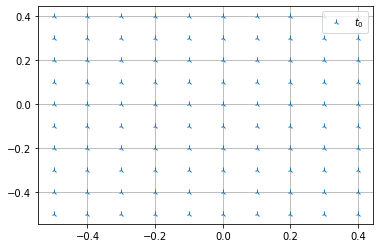

In [6]:
plt.plot(x, y, '2', label='$t_0$')
# plt.xlim = (-0.8, 0.8)
# plt.ylim = (-0.8, 0.8)
plt.legend(loc='upper right')
plt.grid()
plt.show()

In [7]:
# Now I have the 100 particles around the origin: it's time to let them move
# Since we are supposing that it is not present an external field, all the particles have the same
# propbability to move on a 2-D plane: basically right, left, up, down
P_right = P_left = P_up = P_down = 1/4
# We randomically select the probability of going in one of the four directions
from random import randrange

def move(tup, l=0.1):
    x, y = tup
    r = randrange(4)
    if r == 0:
        x+=l # go right
    elif r == 1:
        x-=l # go left
    elif r == 2:
        y+=l # go up
    else:
        y-=l # go down
    return (x, y)

In [8]:
# Now we have to consider the time evolution of our sistem
time_max = 100
Total_Grids = [Grid_points]
for t in range(time_max):
    for i in range(len(Grid_points)):
        Grid_points[i] = move(Grid_points[i])
    New_Grid = np.array(Grid_points)
    first, second = create_grid(New_Grid)
#     plt.plot(first, second, 'o', label=f'$t_{t}$')
#     plt.legend()
#     plt.grid()
#     plt.show()
    Total_Grids.append(New_Grid)
    Grid_points = np.array(New_Grid)
Total_Grids = np.array(Total_Grids)

In [9]:
import os
import imageio
filenames = []
for t in range(time_max+1):
    # plot the line chart
    x, y = create_grid(Total_Grids[t]) 
    plt.plot(x, y, '2', label=f'Time step {t}')
    plt.xlim(-2.5, 2.5)
    plt.ylim(-2.5, 2.5)
    plt.legend(loc='upper right')
    plt.grid()
    # create file name and append it to a list
    filename = f'{t}.png'
    filenames.append(filename)
    
    # save frame
    plt.savefig(filename)
    plt.close()
# build gif
with imageio.get_writer('diffusion.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
        
# Remove files
for filename in set(filenames):
    os.remove(filename)

![](diffusion.gif)

# Now let's calculate how the probability changes over time

In [10]:
# Now let's calculate how the probability changes over time
def calculate_probability(z):
    P_right = P_left = P_up = P_down = 1/4
    z_new_new = np.array([z[i:i+50] for i in range(0, z.shape[0], 50)])
    for i in range(1, z_new_new.shape[0]-1):
        for j in range(1, z_new_new.shape[1]-1):
            omega_i_j = P_right*z_new_new[i-1][j][2] + P_left*z_new_new[i+1][j][2] + P_up*z_new_new[i][j-1][2] + P_down*z_new_new[i][j+1][2]
            z_new_new[i][j][2] = omega_i_j
    # convert z_new_new back into z -> from an array of shape (50, 50, 3) into an array of shape (2500, 3)
    final_z = np.array([z_new_new[i][j] for i in range(z_new_new.shape[0]) for j in range(z_new_new.shape[1])])
    z_to_plot = np.array([final_z[i][2] for i in range(final_z.shape[0])])
    return final_z, z_to_plot/sum(z_to_plot)

In [11]:
z_x = [round(i, 1) for i in np.arange(-2.5, 2.5, l)]
z_y = [round(i, 1) for i in np.arange(-2.5, 2.5, l)]
z = np.array([(x, y, 0) for x in z_x for y in z_y])
z.shape, z

((2500, 3), array([[-2.5, -2.5,  0. ],
        [-2.5, -2.4,  0. ],
        [-2.5, -2.3,  0. ],
        ...,
        [ 2.4,  2.2,  0. ],
        [ 2.4,  2.3,  0. ],
        [ 2.4,  2.4,  0. ]]))

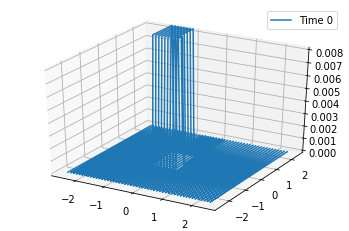

In [12]:
from mpl_toolkits import mplot3d
x, y = create_grid(Total_Grids[0])
for i in range(z.shape[0]):
    prova_x = [round(i, 1) for i in x]
    prova_y = [round(i, 1) for i in y]
    if sum([z[i][2] for i in range(z.shape[0])])>1:
        break
    elif z[i][0] in prova_x and z[i][1] in prova_y:
        z[i][2] = 1./particles_number
z_axes = np.array([z[i][2] for i in range(z.shape[0])])
x_axes = np.array([z[i][0] for i in range(z.shape[0])])
y_axes = np.array([z[i][1] for i in range(z.shape[0])])
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_zlim(0,0.008)
ax.plot3D(x_axes, y_axes, z_axes, label=f'Time 0')
ax.legend(loc='upper right');

In [13]:
filenames = []
conservation_prob = []
for t in range(time_max+1):
    x, y = create_grid(Total_Grids[t])
    if t == 0:
        for i in range(z.shape[0]):
            prova_x = [round(i, 1) for i in x]
            prova_y = [round(i, 1) for i in y]
            if sum([z[i][2] for i in range(z.shape[0])])>1:
                break
            elif z[i][0] in prova_x and z[i][1] in prova_y:
                z[i][2] = 1./particles_number
        z_axes = np.array([z[i][2] for i in range(z.shape[0])])
    else:
        z, z_axes = calculate_probability(z)
    x_axes = np.array([z[i][0] for i in range(z.shape[0])])
    y_axes = np.array([z[i][1] for i in range(z.shape[0])])
    conservation_prob.append(sum(z_axes))
    
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.plot3D(x_axes, y_axes, z_axes, label=f'Time {t}')
    ax.legend()
#     ax.set_zlim(0,0.008)
    filename = f'{t}.png'
    filenames.append(filename)
    
    # save frame
    plt.savefig(filename)
    plt.close()
# build gif
with imageio.get_writer('Probability_diffusion.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
        
# Remove files
for filename in set(filenames):
    os.remove(filename)

![](Probability_diffusion_4_zaxes_fixed.gif)

In [14]:
sum(z_axes) # probabability is conserved if this number is really close to 1

1.000000000000002

In [15]:
np.mean(conservation_prob), np.std(conservation_prob)

(1.0, 1.7658141602604294e-15)

Diffusion                  |  Probability diffusion
:-------------------------:|:-------------------------:
![](diffusion.gif)         |  ![](Probability_diffusion.gif)